In [1]:
%config Completer.use_jedi = False

In [2]:
from pyvis import network as pvnet

In [3]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np
from networkx.drawing.nx_pydot import write_dot

# Auxiliary functions

In [4]:
def random_stochastic(N: int, seed=None) -> np.array:
    """Returns a random stochastic matrix of shape NxN"""
    np.random.seed(seed)
    M = np.random.rand(N, N)
    for _ in range(np.random.randint(0, N*N)):
        M[np.random.randint(0, N), np.random.randint(0, N)] =0
    
    M = M/M.sum(axis=0)
    np.random.seed() #reset
    return M

M = random_stochastic(5, seed=41)
M.round(2)

array([[0.17, 0.  , 0.  , 0.  , 0.22],
       [0.41, 0.21, 0.  , 0.46, 0.78],
       [0.  , 0.  , 0.  , 0.16, 0.  ],
       [0.  , 0.79, 1.  , 0.38, 0.  ],
       [0.42, 0.  , 0.  , 0.  , 0.  ]])

In [5]:
def plot_g_pyviz(G, name='out.html', height='300px', width='500px'):
    g = G.copy() # some attributes added to nodes
    net = pvnet.Network(notebook=True, directed=True, height=height, width=width)
    opts = '''
        var options = {
          "physics": {
            "forceAtlas2Based": {
              "gravitationalConstant": -100,
              "centralGravity": 0.11,
              "springLength": 100,
              "springConstant": 0.09,
              "avoidOverlap": 1
            },
            "minVelocity": 0.75,
            "solver": "forceAtlas2Based",
            "timestep": 0.22
          }
        }
    '''

    net.set_options(opts)
    net.from_nx(g)
    return net.show(name)
def visualize_Markov(M):
    N = M.shape[0]
    G= nx.MultiDiGraph()
    [G.add_node(n) for n in range(N)]
    for row in range(N):
        for col in range(N):
            rate = M[row, col]
            if rate > 1e-6:
                G.add_edge(col, row, weight = rate, label = np.round(rate, 2))
    return plot_g_pyviz(G.copy())
visualize_Markov(M)

# 9.1

Na początku rozpisałam sobie przykładową macierz na podstawie małego grafu i zobaczyłam co się stanie.

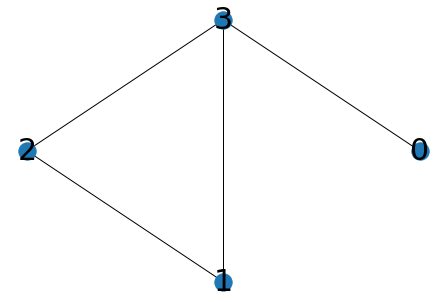

In [6]:
G = nx.Graph()
for e in [(0,3), (2, 3), (3,1), (1,2)]:
    G.add_edge(*e)
nx.draw_circular(G, with_labels=True, font_size=30)

In [7]:
X = np.array([[0, 0, 0, 1/3],[0, 0, 1/2, 1/3], [0, 1/2, 0, 1/3], [1, 1/2, 1/2, 0]])
X

array([[0.        , 0.        , 0.        , 0.33333333],
       [0.        , 0.        , 0.5       , 0.33333333],
       [0.        , 0.5       , 0.        , 0.33333333],
       [1.        , 0.5       , 0.5       , 0.        ]])

In [8]:
visualize_Markov(X)

In [9]:
new = X.copy()
for i in range(30):
    new= np.dot(new, new)
    new = new/new.sum(0)
new

array([[0.125, 0.125, 0.125, 0.125],
       [0.25 , 0.25 , 0.25 , 0.25 ],
       [0.25 , 0.25 , 0.25 , 0.25 ],
       [0.375, 0.375, 0.375, 0.375]])

Teraz czas na dowód:
Oznaczenie $[X]_{ij}$ - element macierzy $X$ w wierszu $i$ i kolumnie $j$

Niech $P$ będzie macierzą procesu Markowa, a $k$ będzie wektorem stopni kolejnych wierzchołków.

$P_{ji}= \frac{A_{ij}}{k_i}$

$[Pk]_{s} = \sum_l P_{sl}k_l = \sum_l \frac{A_{ls}}{k_l}k_l =\sum_l A_{ls} = k_s $

$Pk =k$

Zatem $\dot k:=\frac{k}{\sum_i k_i}$ jest rozkładem stacjonarnym.

Rozkład ergodyczny dla takich macierzy nie zawsze istnieje. Kontrprzykład:

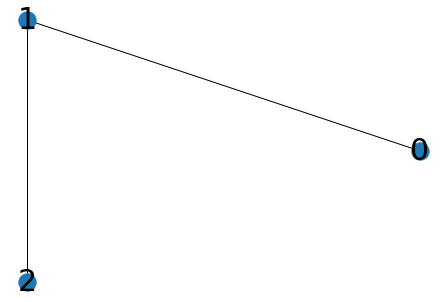

In [10]:
G = nx.Graph()
for e in [(0,1), (1,2)]:
    G.add_edge(*e)
nx.draw_circular(G, with_labels=True, font_size=30)

In [11]:
X = nx.linalg.adj_matrix(G).todense()/np.array(list(dict(G.degree).values()))
X

matrix([[0. , 0.5, 0. ],
        [1. , 0. , 1. ],
        [0. , 0.5, 0. ]])

In [12]:
visualize_Markov(X)

In [13]:
np.linalg.matrix_power(X,2)

matrix([[0.5, 0. , 0.5],
        [0. , 1. , 0. ],
        [0.5, 0. , 0.5]])

In [14]:
np.linalg.matrix_power(X, 3)

matrix([[0. , 0.5, 0. ],
        [1. , 0. , 1. ],
        [0. , 0.5, 0. ]])

# 9.2 

In [15]:
M

array([[0.17151122, 0.        , 0.        , 0.        , 0.21753154],
       [0.41275405, 0.21311289, 0.        , 0.46339479, 0.78246846],
       [0.        , 0.        , 0.        , 0.16016969, 0.        ],
       [0.        , 0.78688711, 1.        , 0.37643552, 0.        ],
       [0.41573472, 0.        , 0.        , 0.        , 0.        ]])

In [16]:
visualize_Markov(M)

In [17]:
eigvalues, eigenvec = scipy.linalg.eig(M)
# eigenvec = np.real(eigenvec)
eigvalues

array([ 1.        +0.j,  0.39846864+0.j,  0.07091159+0.j, -0.22695742+0.j,
       -0.48136317+0.j])

In [18]:
np.round(eigenvec, 2)

array([[-0.  , -0.33, -0.  , -0.31,  0.  ],
       [-0.5 , -0.36,  0.8 , -0.08, -0.53],
       [-0.14,  0.3 , -0.55,  0.43, -0.27],
       [-0.85,  0.74, -0.24, -0.61,  0.8 ],
       [-0.  , -0.35, -0.  ,  0.57, -0.  ]])

In [19]:
pi = eigenvec[: ,np.where(np.abs(eigvalues - 1)<1e-14),]
pi /= pi.sum()
np.round(pi, 2)

array([[[0.  ]],

       [[0.34]],

       [[0.09]],

       [[0.57]],

       [[0.  ]]])

# 9.3
Determine dynamically (by iterating the Markov operator)ergodic density for the random walk on selected network. [20%]

In [20]:
visualize_Markov(M)

In [21]:
new = M.copy()
for i in range(30):
    new= np.dot(new, new)
    new = new/new.sum(0)

In [22]:
new.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.34, 0.34, 0.34, 0.34, 0.34],
       [0.09, 0.09, 0.09, 0.09, 0.09],
       [0.57, 0.57, 0.57, 0.57, 0.57],
       [0.  , 0.  , 0.  , 0.  , 0.  ]])

In [23]:
visualize_Markov(new)

#  9.5 
Determine the value of classic or modified pagerank for theselected network. [30%]

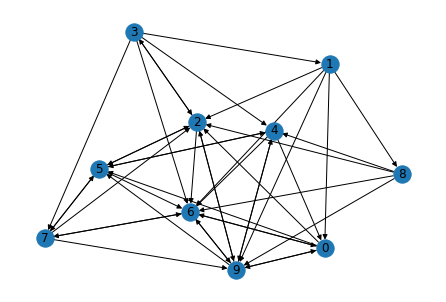

In [24]:
G = nx.DiGraph(nx.directed.random_k_out_graph(10, 8, 0.7, seed=12))
nx.draw_kamada_kawai(G, with_labels=True)

In [25]:
A = nx.linalg.adj_matrix(G).todense()
(A/A.sum(1)).round(2)

array([[0.  , 0.  , 0.25, 0.  , 0.  , 0.25, 0.25, 0.  , 0.  , 0.25],
       [0.2 , 0.  , 0.2 , 0.  , 0.  , 0.  , 0.2 , 0.  , 0.2 , 0.2 ],
       [0.  , 0.  , 0.2 , 0.2 , 0.  , 0.2 , 0.2 , 0.  , 0.  , 0.2 ],
       [0.  , 0.2 , 0.2 , 0.  , 0.2 , 0.  , 0.2 , 0.2 , 0.  , 0.  ],
       [0.2 , 0.  , 0.  , 0.  , 0.2 , 0.2 , 0.2 , 0.  , 0.  , 0.2 ],
       [0.  , 0.  , 0.25, 0.  , 0.25, 0.  , 0.25, 0.25, 0.  , 0.  ],
       [0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.25, 0.  , 0.25],
       [0.  , 0.  , 0.25, 0.  , 0.  , 0.25, 0.25, 0.  , 0.  , 0.25],
       [0.  , 0.  , 0.25, 0.  , 0.25, 0.  , 0.25, 0.  , 0.  , 0.25],
       [0.2 , 0.  , 0.2 , 0.  , 0.2 , 0.2 , 0.2 , 0.  , 0.  , 0.  ]])

In [26]:
from copy import copy
class PageRank:
    def __init__(self, G: nx.Graph, beta:float=0.15, n_iter:int =500):
        self.beta = beta
        self.n_iter = n_iter
        self.G = G
        self.adj_matrix = nx.linalg.adj_matrix(G).todense()
        self.adj_matrix = self.adj_matrix / self.adj_matrix.sum(axis=1)
        self.page_rank = np.ones(len(G.nodes)).reshape(1, -1)
    def update_page_rank(self):
        self.page_rank =  self.page_rank @ self.adj_matrix 
        self.page_rank/= self.page_rank.sum()
        self.page_rank = self.beta/len(self.page_rank) + (1-self.beta)*self.page_rank
    def get_page_rank(self):
        for _ in range(self.n_iter):
            self.update_page_rank()
        return np.array(self.page_rank).reshape(-1)
pr = PageRank(G).get_page_rank()
pr

array([0.23051419, 0.16238759, 0.29361481, 0.17124022, 0.2374419 ,
       0.24947197, 0.34168885, 0.21584362, 0.16174719, 0.28604967])

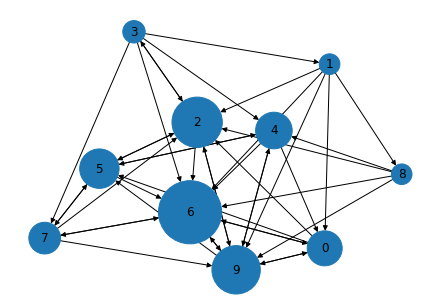

In [27]:
nx.draw_kamada_kawai(G, with_labels=True, node_size=pr**3*1e5)